In [1]:
import pandas as pd
import re
import math

In [2]:
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns
import openpyxl

In [28]:
!pip install openpyxl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 453.0 kB/s eta 0:00:00a 0:00:01


In [3]:
#sample data load
df = pd.read_csv('./src_data/finalcate.csv', dtype=str)

In [30]:
df.to_excel("./src_data/cate.xlsx")

In [12]:
df.head(5)

,Unnamed: 0,test_id,test_name,speciment,attr_id,attr_name,unit,result,data_type,noraml_range
0,86,10994,Complete Urine Analysis (Urine R/E),URINE,14491.0,Protein,Null,(+),Categorical,NaN
1,87,10994,Complete Urine Analysis (Urine R/E),URINE,14493.0,Ketones body,Null,Absent,Categorical,NaN
2,90,10994,Complete Urine Analysis (Urine R/E),URINE,14495.0,Urobilinogen,Null,Normal,Categorical,NaN
3,91,10994,Complete Urine Analysis (Urine R/E),URINE,14496.0,Pus Cell,Null,0-2,Categorical,NaN
4,92,10994,Complete Urine Analysis (Urine R/E),URINE,14497.0,Sediment,Null,Nil,Categorical,NaN


In [13]:
df.size

1849060

In [14]:
len(df['attr_name'].unique())

395

In [5]:
df_c = df

In [8]:
df_count = df_c.groupby(['test_id','test_name','attr_id','attr_name','speciment','unit'], as_index = False)['result'].agg(['unique'])

df_count = pd.DataFrame(df_count)
df_count.to_excel("./src_data/df_count_full.xlsx")

In [ ]:
def each_count():
    df_count = df.groupby(['test_id','test_name','attr_id','attr_name'], as_index = False)['result'].agg(['unique'])

    df_count = pd.DataFrame(df_count)
    df_count.to_csv("./src_data/df_count.csv")
    

In [16]:
# '<' extraction
df_lower_op = df[df['result'].str.contains('<', regex= True)]
cond = df['result'].isin(df_lower_op['result'])
df.drop(df[cond].index, inplace = True)
df_lower_op.head(5)

,Unnamed: 0,test_id,test_name,speciment,attr_id,attr_name,unit,result,data_type,noraml_range
741,5220,10042,BETA hCG,BLOOD,10399.0,?hCG,mIU/mL,< 1.20,Categorical,NaN
868,6128,10327,Anti-CCP Antibody (ELISA),BLOOD,11995.0,Anti CCP Antibody,U/mL,< 0.5,Categorical,NaN
1324,9746,10531,CRP (C-Reactive Protein),BLOOD,12447.0,CRP (C-Reactive Protein),mg/L,< 0.2,Categorical,NaN
2873,19297,10042,BETA hCG,BLOOD,10399.0,?hCG,mIU/mL,< 1.20,Categorical,NaN
3767,25847,10963,D-Dimer,BLOOD,14403.0,D-Dimer,ng/ml,< 140,Categorical,NaN


In [18]:
df_lower_op[['Inequality','Number']] = df_lower_op.result.str.split(n=1,expand = True)

/tmp/ipykernel_1383/727445804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lower_op[['Inequality','Number']] = df_lower_op.result.str.split(n=1,expand = True)
/tmp/ipykernel_1383/727445804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lower_op[['Inequality','Number']] = df_lower_op.result.str.split(n=1,expand = True)


In [19]:
df_lower_op

,Unnamed: 0,test_id,test_name,speciment,attr_id,attr_name,unit,result,data_type,noraml_range,Inequality,Number
741,5220,10042,BETA hCG,BLOOD,10399.0,?hCG,mIU/mL,< 1.20,Categorical,NaN,<,1.20
868,6128,10327,Anti-CCP Antibody (ELISA),BLOOD,11995.0,Anti CCP Antibody,U/mL,< 0.5,Categorical,NaN,<,0.5
1324,9746,10531,CRP (C-Reactive Protein),BLOOD,12447.0,CRP (C-Reactive Protein),mg/L,< 0.2,Categorical,NaN,<,0.2
2873,19297,10042,BETA hCG,BLOOD,10399.0,?hCG,mIU/mL,< 1.20,Categorical,NaN,<,1.20
3767,25847,10963,D-Dimer,BLOOD,14403.0,D-Dimer,ng/ml,< 140,Categorical,NaN,<,140
...,...,...,...,...,...,...,...,...,...,...,...,...
184899,3527680,5030472,Thyroglobulin-(Thyroglobulin),NaN,3002812.0,Thyroglobulin,ng/ml,<0.20,Categorical,upto 55 ng/ml,<0.20,None
184900,3527681,5030472,Thyroglobulin-(Thyroglobulin),NaN,3002812.0,Thyroglobulin,ng/ml,<0.20,Categorical,Upto 55.0 ng/ml,<0.20,None
184901,3527682,5030472,Thyroglobulin-(Thyroglobulin),NaN,3002812.0,Thyroglobulin,ng/ml,<0.20,Categorical,Upto 55.0 ng/ml,<0.20,None
184904,3529318,5027602,EBV IgM,NaN,3002226.0,EBV IgM,[Negative],<5.0,Categorical,Negative: <09 U/ml Positive: >13 U/ml,<5.0,None


In [78]:
# '>' extraction
df_higher_op = df[df['result'].str.contains('>', regex= True)]
cond = df['result'].isin(df_higher_op['result'])
df.drop(df[cond].index, inplace = True)
df_higher_op.head(5)

,Unnamed: 0,test_id,test_name,speciment,attr_id,attr_name,unit,result,data_type,noraml_range
740,5213,10474,CA-19.9,BLOOD,12291.0,Serum CA 19-9,U/ml,> 12000.00,Categorical,NaN
1606,11800,10261,Stool/Fecal for Calprotectin,STOOL,11627.0,Stool for Calprotectin,?g/gm,>1000.0,Categorical,NaN
5468,41220,10655,CBC,BLOOD,13381.0,M.P.V,fL,>>>>,Categorical,NaN
9692,72549,10655,CBC,BLOOD,13381.0,M.P.V,fL,>>>>,Categorical,NaN
10025,75935,10655,CBC,BLOOD,13381.0,M.P.V,fL,>>>>,Categorical,NaN


In [79]:
#floating point extraction

In [80]:
def regex_filter(val):
    if val:
        mo = re.search('[+-]?([0-9]*[.])?[0-9]+',val)
        if mo:
            return True
        else:
            return False
    else:
        return False

df_float = df[df['result'].apply(regex_filter)]
cond = df['result'].isin(df_float['result'])
df.drop(df[cond].index, inplace = True)

df_float.head(5)

,Unnamed: 0,test_id,test_name,speciment,attr_id,attr_name,unit,result,data_type,noraml_range
3,91,10994,Complete Urine Analysis (Urine R/E),URINE,14496.0,Pus Cell,Null,0-2,Categorical,NaN
9,97,10994,Complete Urine Analysis (Urine R/E),URINE,14502.0,Epithelial Cells,Null,1-3,Categorical,NaN
10,98,10994,Complete Urine Analysis (Urine R/E),URINE,14503.0,RBC,Null,0-1,Categorical,NaN
28,208,10057,Grouping + Cross Matching + Screening,BLOOD,10429.0,Unit :,Null,1 Unit,Categorical,NaN
32,214,10057,Grouping + Cross Matching + Screening,BLOOD,10435.0,Age :,Null,26 Yrs,Categorical,NaN


In [81]:
#QNS extraction

In [82]:
df_qns =df.loc[df['result'].isin(["QNS","Q.N.S"])]
cond = df['result'].isin(df_qns['result'])
df.drop(df[cond].index, inplace = True)
df_qns.head(5)

,Unnamed: 0,test_id,test_name,speciment,attr_id,attr_name,unit,result,data_type,noraml_range
92,592,10655,CBC,BLOOD,13387.0,ESR,mm in 1st hour,QNS,Categorical,NaN
3795,26209,10655,CBC,BLOOD,13364.0,ESR (Westergren Method),mm in 1st hour,QNS,Categorical,NaN
4914,35311,10655,CBC,BLOOD,13364.0,ESR (Westergren Method),mm in 1st hour,QNS,Categorical,NaN
5640,42558,10655,CBC,BLOOD,13387.0,ESR,mm in 1st hour,QNS,Categorical,NaN
6411,47278,10655,CBC,BLOOD,13387.0,ESR,mm in 1st hour,QNS,Categorical,NaN


In [83]:
df_qns.size

7870

In [84]:
count_qns = df_qns[['result']].groupby(['result']).size()

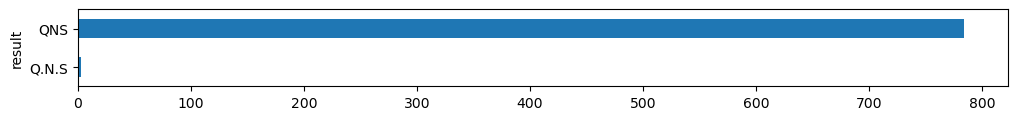

In [85]:
plot = count_qns.plot.barh(y='mass', figsize=(12, 1))

In [86]:
#not found extraction

In [87]:
df_nf =df.loc[df['result'].isin(["Not Found","Not found",'Nor Found',"Not found.",'Not done'])]
cond = df['result'].isin(df_nf['result'])
df.drop(df[cond].index, inplace = True)
df_nf.head(5)

,Unnamed: 0,test_id,test_name,speciment,attr_id,attr_name,unit,result,data_type,noraml_range
618,4203,10617,Stool R/E,STOOL,13030.0,Stercobilinogen,Null,Not done,Categorical,NaN
619,4204,10617,Stool R/E,STOOL,13031.0,A. lumbricoides,Null,Not found,Categorical,NaN
620,4205,10617,Stool R/E,STOOL,13032.0,Hook Worm,Null,Not found,Categorical,NaN
621,4206,10617,Stool R/E,STOOL,13033.0,T. trichiura,Null,Not found,Categorical,NaN
630,4215,10617,Stool R/E,STOOL,13042.0,Floatation method,Null,Not done,Categorical,NaN


In [88]:
df_nf.size

61530

In [89]:
count_nf = df_nf[['result']].groupby(['result']).size()

In [90]:
count_nf['']

KeyError: ''

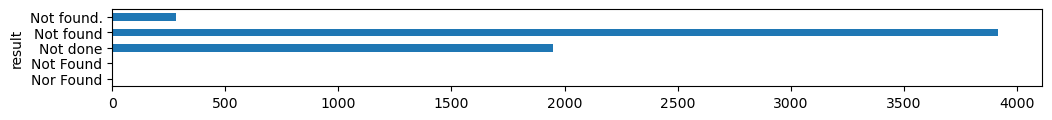

In [91]:
plot = count_nf.plot.barh(y='mass', figsize=(12, 1))

In [92]:
# "isr" extraction

In [130]:
df_isr =df.loc[df['result'].isin(["I","S","R","T"])]
cond = df['result'].isin(df_isr['result'])
df.drop(df[cond].index, inplace = True)
df_isr.head(5)


,Unnamed: 0,test_id,test_name,speciment,attr_id,attr_name,unit,result,data_type,noraml_range
86237,585441,10579,HVS for C/S,HVS,12766.0,Tobramycin,Null,S,Categorical,NaN
86238,585446,10579,HVS for C/S,HVS,12762.0,Tigecycline,Null,S,Categorical,NaN
86239,585450,10579,HVS for C/S,HVS,12758.0,Piperacillin/Tazobactum,Null,S,Categorical,NaN
86240,585451,10579,HVS for C/S,HVS,12757.0,Meropenem,Null,S,Categorical,NaN
86241,585452,10579,HVS for C/S,HVS,12756.0,Colistin,Null,S,Categorical,NaN


In [131]:
df_isr.size

1240

In [96]:
df_isr_count = df_isr.groupby(['result']).size().reset_index(name='counts').sort_values(['counts'], ascending=[False])
df_isr_count['ratio'] = df_isr_count ['counts'].apply(lambda x: (x/df.shape[0])*100.00)
df_isr_count

,result,counts,ratio
1,R,58,0.036434
2,S,39,0.024499
0,I,22,0.013820
3,T,5,0.003141


In [132]:
def group_counter(df):
    count = df.groupby(['result']).size().reset_index(name='counts').sort_values(['counts'], ascending=[False])
    count['ratio'] = df_isr_count ['counts'].apply(lambda x: (x/df.shape[0])*100.00)
    return count

In [135]:
isr_count = group_counter(df_isr)
isr_count

,result,counts,ratio
1,R,58,46.774194
2,S,39,31.451613
0,I,22,17.741935
3,T,5,4.032258


In [172]:
def distribut_graph(group_name : str, df, figx : int, figy : int, savep : str):
    
    value_c = pd.DataFrame(df['result'].value_counts())

    sum = 0
    for  x in value_c.result:
        sum += x

    percent = []

    for x  in value_c.result:
        p = math.trunc((x/sum)*100)
        percent.append(p)


    perc = percent[0:10]

    print(perc)

    value_set = list(value_c.index[0:15])

    count = list(value_c.result[0:15])

    fig , ax = plt.subplots(figsize=(figx,figy))

    ax.legend([group_name], loc="upper left")

    ax2 = ax.twinx()

    ax2.plot(perc)

    ax2.set_ylabel("percentage")

    barchart = sns.barplot(x = value_set , y = count, ax = ax)

    barchart.bar_label(ax.containers[0], label_type='edge', padding=20)

    fig = barchart.get_figure()

    fig.savefig(savep)

[46, 31, 17, 4]


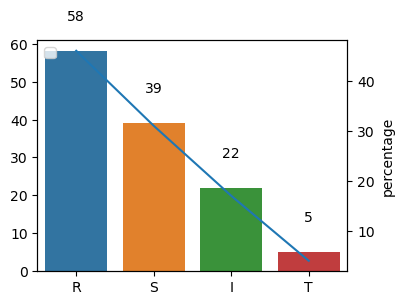

In [173]:
distribut_graph("isr",df_isr, figx =4 , figy = 3,savep = "isr.png")

In [ ]:
count_isr = df_isr[['result']].groupby(['result']).size()

In [ ]:
plot = count_isr.plot.barh(y='mass', figsize=(12, 1))

In [47]:
#present finding test

In [153]:
group_list1 = ["Chikungunya Antibody IgM", "ASO Titre", "Anti-HCV", "HIV Ab I&II","HBe Ag",
                                          "HIV(1+2)-Confirmetory","Rose Waaler Test","Anti-HBc IgM","HBc Total",
                                          "Coomb's Test (Direct)","Coomb's Test (Indirect)","Herpes Simplex Virus (I) IgM",
                                          "Herpes Simplex Virus (I) IgG","Toxoplasma IgM","2. Anti HCV","3. HIV I & II",
                                          "HBsAg","Anti HCV","HIV I & II","Syphilis (VDRL)","5. Malarial Parasite (ICT)",
                                          "Herpes Simplex Virus (HSV) I & II IgM","Cytomegalo Virus IgM","Leptospiral ab IgG",
                                          "Leptospiral ab IgM","Direct Coomb's test","Indirect Coomb's test","HBc Total",
                                          "Anti-HBc Total", "Anti-HAV IgM", "Anti-HBc Total","HIV(1+2)-Confirmetory","HBsAg",
                                          "Anti HCV", "HIV I & II","1. HBsAg","2. Anti HCV","3. HIV I & II",
                                          "5. Malarial Parasite (ICT)","Filaria Ab-IgM","Filaria Ag",
                                          "Direct","Indirect","Herpes Simplex Virus (HSV) I & II IgG","2.  Anti HCV","Dengue Antibody IgG (ICT)","CFT-Filaria",
                                         "Dengue Antibody IgM (ICT)","Dengue Ag NS1 (ICT)"]

In [151]:
def grouping( df , group_list):
    df_s = df.loc[df['attr_name'].isin(group_list)]
    choose = df['result'].isin(df_s['result'])
    df.drop(df[choose].index, inplace = True)
    
    return df_s

In [154]:
df_presence = grouping(df, group_list = group_list1)

In [157]:
df_precence_grp = group_counter(df_presence)

[95, 3, 0, 0, 0, 0, 0, 0, 0, 0]


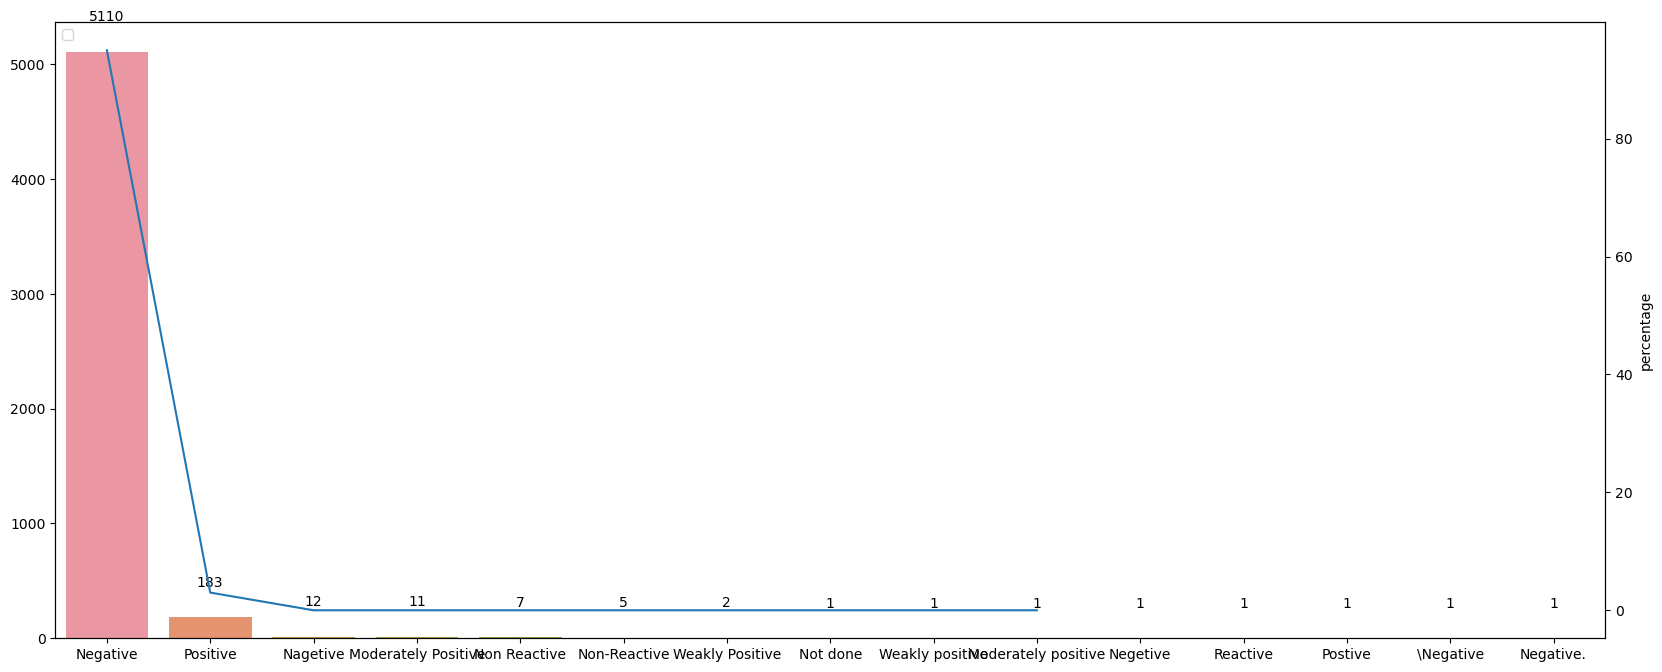

In [175]:
distribut_graph("presence finding",df_presence, figx =20 , figy = 8,savep = "pre.png")

In [110]:
df_presence =df.loc[df['attr_name'].isin(["Chikungunya Antibody IgM", "ASO Titre", "Anti-HCV", "HIV Ab I&II","HBe Ag",
                                          "HIV(1+2)-Confirmetory","Rose Waaler Test","Anti-HBc IgM","HBc Total",
                                          "Coomb's Test (Direct)","Coomb's Test (Indirect)","Herpes Simplex Virus (I) IgM",
                                          "Herpes Simplex Virus (I) IgG","Toxoplasma IgM","2. Anti HCV","3. HIV I & II",
                                          "HBsAg","Anti HCV","HIV I & II","Syphilis (VDRL)","5. Malarial Parasite (ICT)",
                                          "Herpes Simplex Virus (HSV) I & II IgM","Cytomegalo Virus IgM","Leptospiral ab IgG",
                                          "Leptospiral ab IgM","Direct Coomb's test","Indirect Coomb's test","HBc Total",
                                          "Anti-HBc Total", "Anti-HAV IgM", "Anti-HBc Total","HIV(1+2)-Confirmetory","HBsAg",
                                          "Anti HCV", "HIV I & II","1. HBsAg","2. Anti HCV","3. HIV I & II",
                                          "5. Malarial Parasite (ICT)","Filaria Ab-IgM","Filaria Ag",
                                          "Direct","Indirect","Herpes Simplex Virus (HSV) I & II IgG","2.  Anti HCV","Dengue Antibody IgG (ICT)","CFT-Filaria",
                                         "Dengue Antibody IgM (ICT)","Dengue Ag NS1 (ICT)"])]

cond = df['result'].isin(df_presence['result'])
df.drop(df[cond].index, inplace = True)
df_presence.head(5)


,Unnamed: 0,test_id,test_name,speciment,attr_id,attr_name,unit,result,data_type,noraml_range
39,222,10057,Grouping + Cross Matching + Screening,BLOOD,10441.0,2. Anti HCV,Null,Negative,Categorical,NaN
144,1075,10231,Dengue Ag NS1 (ICT),BLOOD,11424.0,Dengue Ag NS1 (ICT),Null,Negative,Categorical,NaN
216,1437,10057,Grouping + Cross Matching + Screening,BLOOD,10441.0,2. Anti HCV,Null,Negative,Categorical,NaN
224,1595,10231,Dengue Ag NS1 (ICT),BLOOD,11424.0,Dengue Ag NS1 (ICT),Null,Negative,Categorical,NaN
225,1659,10231,Dengue Ag NS1 (ICT),BLOOD,11424.0,Dengue Ag NS1 (ICT),Null,Negative,Categorical,NaN


In [155]:
df_presence.size

53380

In [50]:
count_presence = df_presence[['result']].groupby(['result']).size()

In [59]:
count_presence.keys().to_list()

['Moderately Positive',
 'Moderately positive',
 'Nagetive',
 'Negative',
 'Negative.',
 'Negetive',
 'Non Reactive',
 'Non-Reactive',
 'Positive',
 'Postive',
 'Reactive',
 'Weakly Positive',
 'Weakly positive',
 '\\Negative']

In [683]:
# "blood type test exraction"

In [620]:
df_blood =df.loc[df['attr_name'].isin([	"Rh Type :","Blood Group :","Blood Group :","Blood Group :","Rh (D)","Blood Group: ABO","Blood Group: ABO"])]
cond = df['result'].isin(df_blood['result'])
df.drop(df[cond].index, inplace = True)
df_blood.head(5)


,Unnamed: 0,test_id,test_name,speciment,attr_id,attr_name,unit,result,data_type,noraml_range
25,204,10424,Blood Grouping and Rh Factor,BLOOD,12148.0,Blood Group: ABO,Null,"""O""",Categorical,NaN
26,205,10424,Blood Grouping and Rh Factor,BLOOD,12149.0,Rh (D),Null,Positive (+ve),Categorical,NaN
29,210,10057,Grouping + Cross Matching + Screening,BLOOD,10431.0,Blood Group :,Null,"""O""",Categorical,NaN
34,216,10057,Grouping + Cross Matching + Screening,BLOOD,10431.0,Blood Group :,Null,"""O""",Categorical,NaN
158,1288,10424,Blood Grouping and Rh Factor,BLOOD,12148.0,Blood Group: ABO,Null,"""O""",Categorical,NaN


In [621]:
df_blood.size

42040

In [622]:
count_blood = df_blood[['result']].groupby(['result']).size()

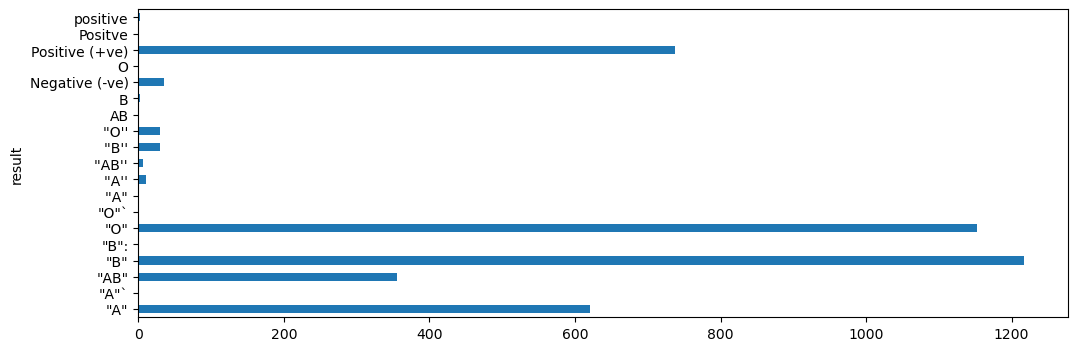

In [623]:
plot = count_blood.plot.barh(y='mass', figsize=(12, 4))

In [624]:
df_patho =df.loc[df['attr_name'].isin(["Syphilis (VDRL)","4. Syphilis (VDRL)"," HIV I & II","VDRL","4.  Syphilis (VDRL)","HBs Ag"])]
cond = df['result'].isin(df_patho['result'])
df.drop(df[cond].index, inplace = True)

df_patho.head(5)

,Unnamed: 0,test_id,test_name,speciment,attr_id,attr_name,unit,result,data_type,noraml_range
10289,77547,10107,"Stock W/B, PBRC",BLOOD,10600.0,4. Syphilis (VDRL),Null,Non Reactivetive,Categorical,NaN
10303,77566,10107,"Stock W/B, PBRC",BLOOD,10600.0,4. Syphilis (VDRL),Null,Non Reactivetive,Categorical,NaN
23499,167186,10107,"Stock W/B, PBRC",BLOOD,10600.0,4. Syphilis (VDRL),Null,Non Reactivetive,Categorical,NaN
24557,174919,10107,"Stock W/B, PBRC",BLOOD,10600.0,4. Syphilis (VDRL),Null,Non Reactivetive,Categorical,NaN
24699,175249,10107,"Stock W/B, PBRC",BLOOD,10600.0,4. Syphilis (VDRL),Null,Non Reactivetive,Categorical,NaN


In [625]:
count_patho = df_patho[['result']].groupby(['result']).size()

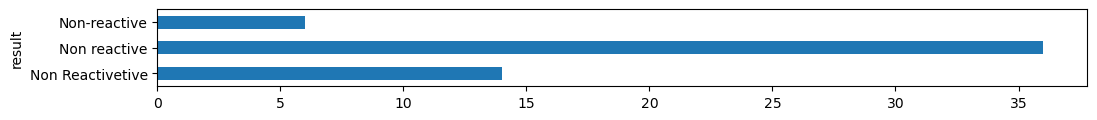

In [626]:
plot = count_patho.plot.barh(y='mass', figsize=(12, 1))

In [627]:
#"different dipstick test extraction"

In [60]:
df_test =df.loc[df['attr_name'].isin(["Albumin","Gastric lavage for Biochemistry","Blood","Fat Globules",
                                      "Albumin","sugar","Yeast","Spermatozoa","Vegetable Cells","Starch","Muscle Fibres",
                                      "Fat Globules","Yeasts","Ketones body","Acetone","Sedimen :","Bence Jones Protein","Sediment :",
                                      "Pus cells", "Gram negative extracellur diplococci","Gram Positive Cocci","Gram Negative Bacilli",
                                     "Sugar","Viscosity","Urobilinogen","Bilirubin"])]
cond = df['result'].isin(df_test['result'])
df.drop(df[cond].index, inplace = True)
df_test.head(5)

,Unnamed: 0,test_id,test_name,speciment,attr_id,attr_name,unit,result,data_type,noraml_range
1,87,10994,Complete Urine Analysis (Urine R/E),URINE,14493.0,Ketones body,Null,Absent,Categorical,NaN
2,90,10994,Complete Urine Analysis (Urine R/E),URINE,14495.0,Urobilinogen,Null,Normal,Categorical,NaN
5,93,10994,Complete Urine Analysis (Urine R/E),URINE,14498.0,Blood,Null,Nil,Categorical,NaN
11,100,10994,Complete Urine Analysis (Urine R/E),URINE,14506.0,Yeast,Null,Nil,Categorical,NaN
17,109,10994,Complete Urine Analysis (Urine R/E),URINE,14517.0,Sugar,Null,Nil,Categorical,NaN


In [629]:
df_test.size

287940

In [61]:
count_test = df_test[['result']].groupby(['result']).size()

In [63]:
count_test.keys().to_list()

['(+)',
 '(++)',
 '(+++)',
 '(++++)',
 '+',
 '++',
 '+++',
 '++++',
 'A Few',
 'A few',
 'Absent',
 'Few',
 'N/S',
 'N/s',
 'NIl',
 'Nil',
 'No microorganism seen.',
 'Normal',
 'Normal.',
 'Not Done',
 'Occasional',
 'Plenty',
 'Present',
 'Present (+)',
 'Present (++)',
 'Trace',
 'Very few',
 'a few',
 'nil']

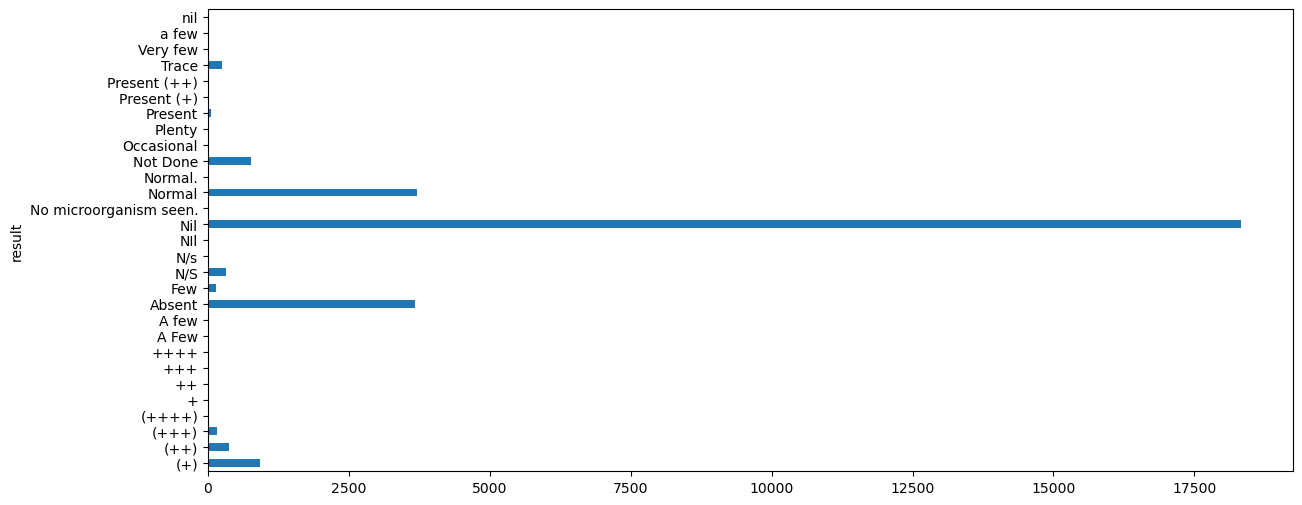

In [62]:
plot = count_test.plot.barh(y='mass', figsize=(14, 6))

In [632]:
df_appe =df.loc[df['attr_name'].isin(["Colour :","Appearance :","Physical examination :","Colour :","Appearance :","Colour :","Appearance :","Appearance","Colour","Color","Appearance/Color"])]
cond = df['result'].isin(df_appe['result'])
df.drop(df[cond].index, inplace = True)
df_appe.head(5)

,Unnamed: 0,test_id,test_name,speciment,attr_id,attr_name,unit,result,data_type,noraml_range
6,94,10994,Complete Urine Analysis (Urine R/E),URINE,14499.0,Appearance,Null,Clear,Categorical,NaN
8,96,10994,Complete Urine Analysis (Urine R/E),URINE,14501.0,Colour,Null,Straw,Categorical,NaN
48,233,10994,Complete Urine Analysis (Urine R/E),URINE,14499.0,Appearance,Null,Clear,Categorical,NaN
50,235,10994,Complete Urine Analysis (Urine R/E),URINE,14501.0,Colour,Null,Straw,Categorical,NaN
73,423,10994,Complete Urine Analysis (Urine R/E),URINE,14499.0,Appearance,Null,Clear,Categorical,NaN


In [633]:
df.size

125620

In [634]:
count_appe = df_appe[['result']].groupby(['result']).size()

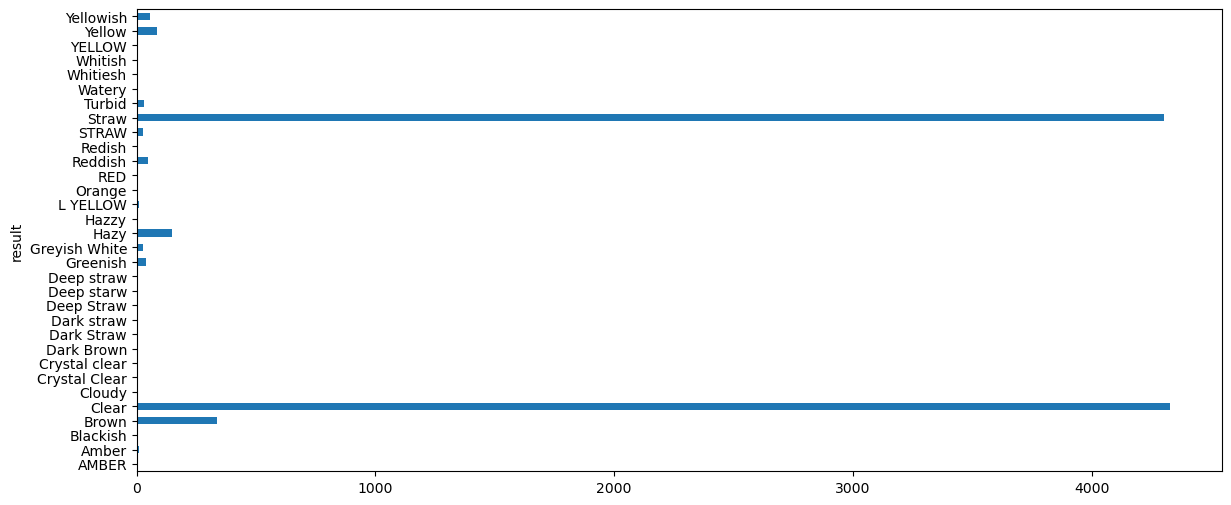

In [635]:
plot = count_appe.plot.barh(y='mass', figsize=(14, 6))

In [636]:
# "com" extraction

In [637]:
df_comp =df.loc[df['attr_name'].isin(["Cross Match with donor", "Cross Match with donor :","Cross Match with donor :","Cross Match with donor :"])]
cond = df['result'].isin(df_comp['result'])
df.drop(df[cond].index, inplace = True)
df_comp.head(5)

,Unnamed: 0,test_id,test_name,speciment,attr_id,attr_name,unit,result,data_type,noraml_range
37,219,10057,Grouping + Cross Matching + Screening,BLOOD,10438.0,Cross Match with donor,Null,Compatible,Categorical,NaN
214,1434,10057,Grouping + Cross Matching + Screening,BLOOD,10438.0,Cross Match with donor,Null,Compatible,Categorical,NaN
303,2313,10057,Grouping + Cross Matching + Screening,BLOOD,10438.0,Cross Match with donor,Null,Compatible,Categorical,NaN
318,2332,10057,Grouping + Cross Matching + Screening,BLOOD,10438.0,Cross Match with donor,Null,Compatible,Categorical,NaN
333,2351,10057,Grouping + Cross Matching + Screening,BLOOD,10438.0,Cross Match with donor,Null,Compatible,Categorical,NaN


In [638]:
df_comp.size

13380

In [639]:
count_comp = df_comp[['result']].groupby(['result']).size()

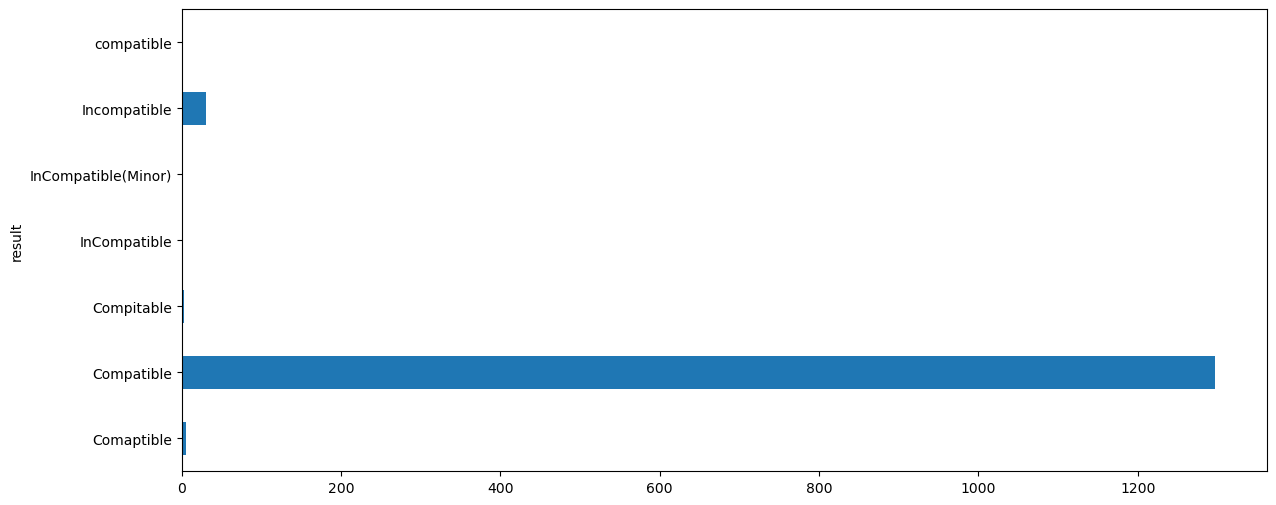

In [640]:
plot = count_comp.plot.barh(y='mass', figsize=(14, 6))

In [641]:
#stain extracton

In [642]:
df_stn =df.loc[df['attr_name'].isin(["Default","Gram Stain","Pus for Gram stain"])]
cond = df['result'].isin(df_stn['result'])
df.drop(df[cond].index, inplace = True)
df_stn.head(5)

,Unnamed: 0,test_id,test_name,speciment,attr_id,attr_name,unit,result,data_type,noraml_range
1969,14127,10736,Tracheal Aspirate for Gram Stain,TRACHEAL ASPIRATE,13615.0,Default,Null,Few Gram positive cocci seen.,Categorical,NaN
1996,14456,10736,Tracheal Aspirate for Gram Stain,TRACHEAL ASPIRATE,13615.0,Default,Null,Few Gram positive cocci seen.,Categorical,NaN
4943,35760,10736,Tracheal Aspirate for Gram Stain,TRACHEAL ASPIRATE,13616.0,Gram Stain,Null,Few Gram negative bacilli seen.,Categorical,NaN
4974,36559,10736,Tracheal Aspirate for Gram Stain,TRACHEAL ASPIRATE,13616.0,Gram Stain,Null,Moderate number of Gram negative bacilli seen.,Categorical,NaN
4976,37018,10736,Tracheal Aspirate for Gram Stain,TRACHEAL ASPIRATE,13616.0,Gram Stain,Null,Budding yeast (+).,Categorical,NaN


In [643]:
count_stn = df_stn[['result']].groupby(['result']).size()

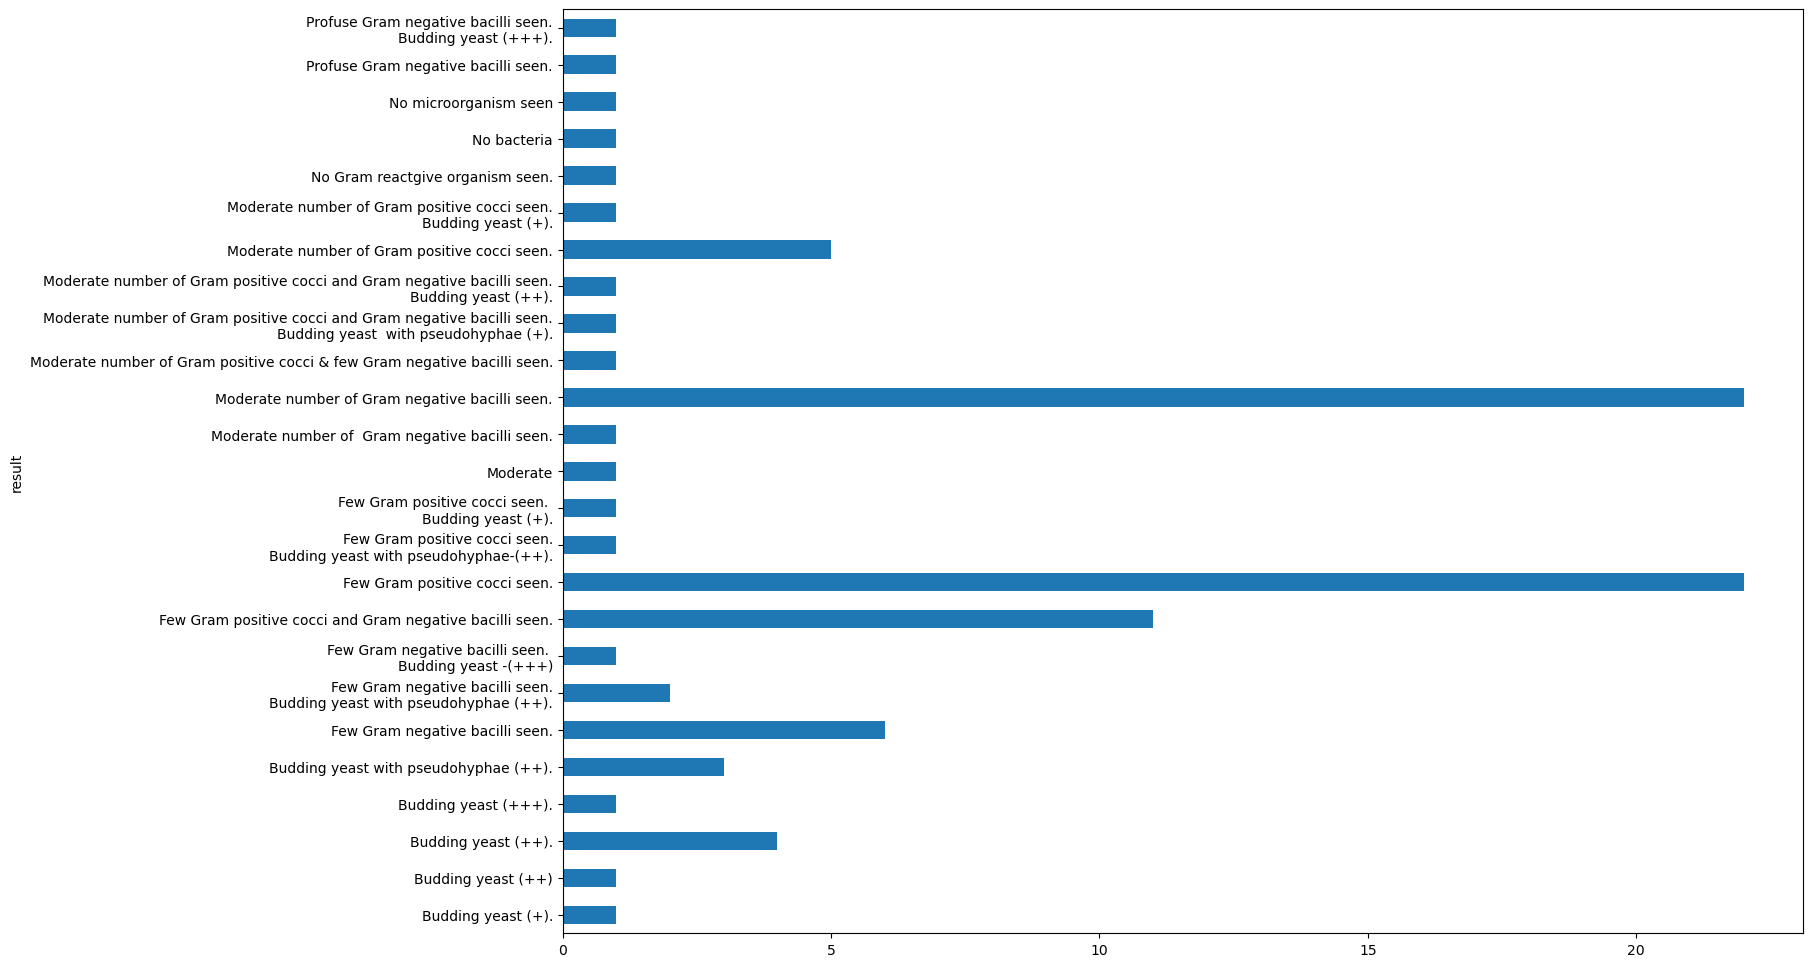

In [644]:
plot = count_stn.plot.barh(y='mass', figsize=(16, 12))

In [645]:
#gender extraction

In [646]:
df_g =df.loc[df['attr_name'].isin(["Gender :","Gender"])]
cond = df['result'].isin(df_g['result'])
df.drop(df[cond].index, inplace = True)
df_g.head(5)

,Unnamed: 0,test_id,test_name,speciment,attr_id,attr_name,unit,result,data_type,noraml_range
33,215,10057,Grouping + Cross Matching + Screening,BLOOD,10436.0,Gender :,Null,Male,Categorical,NaN
210,1430,10057,Grouping + Cross Matching + Screening,BLOOD,10436.0,Gender :,Null,Male,Categorical,NaN
223,1555,10131,e-GFR (Estimated G. Filtration Rate),BLOOD,10653.0,Gender,Null,Male,Categorical,NaN
299,2309,10057,Grouping + Cross Matching + Screening,BLOOD,10436.0,Gender :,Null,Male,Categorical,NaN
314,2328,10057,Grouping + Cross Matching + Screening,BLOOD,10436.0,Gender :,Null,Male,Categorical,NaN


In [647]:
df_g.size

14710

In [648]:
count_g = df_g[['result']].groupby(['result']).size()

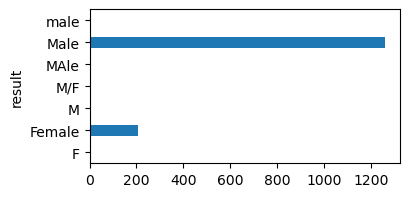

In [649]:
plot = count_g.plot.barh(y='mass', figsize=(4, 2))

In [650]:
#donor inforamtion

In [651]:
df_d =df.loc[df['attr_name'].isin(["Donor information :","Blood Component :"])]
cond = df['result'].isin(df_d['result'])
df.drop(df[cond].index, inplace = True)
df_d.head(5)

,Unnamed: 0,test_id,test_name,speciment,attr_id,attr_name,unit,result,data_type,noraml_range
36,218,10057,Grouping + Cross Matching + Screening,BLOOD,10437.0,Blood Component :,Null,PRBC,Categorical,NaN
213,1433,10057,Grouping + Cross Matching + Screening,BLOOD,10437.0,Blood Component :,Null,Whole Blood,Categorical,NaN
302,2312,10057,Grouping + Cross Matching + Screening,BLOOD,10437.0,Blood Component :,Null,Whole Blood,Categorical,NaN
317,2331,10057,Grouping + Cross Matching + Screening,BLOOD,10437.0,Blood Component :,Null,Whole Blood,Categorical,NaN
332,2350,10057,Grouping + Cross Matching + Screening,BLOOD,10437.0,Blood Component :,Null,Whole Blood,Categorical,NaN


In [652]:
count_d = df_d[['result']].groupby(['result']).size()

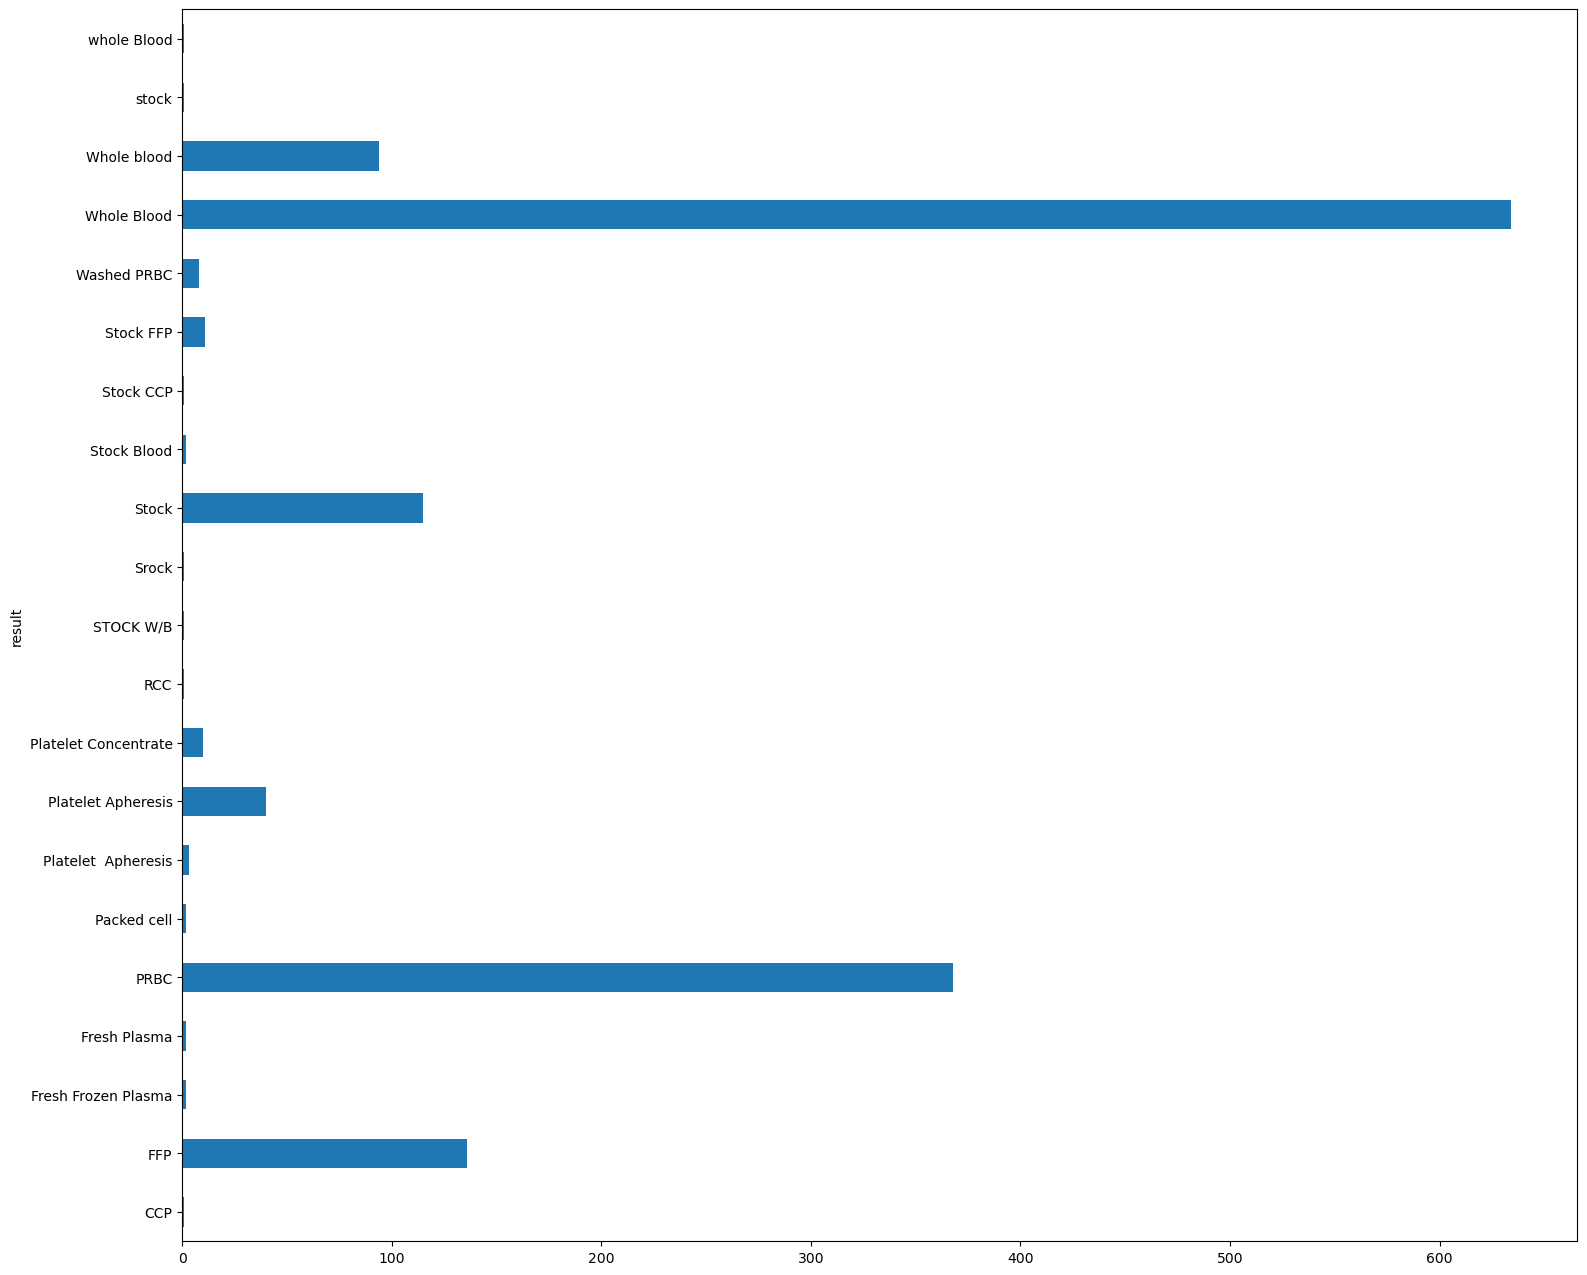

In [653]:
plot = count_d.plot.barh(y='mass', figsize=(18, 16))

In [654]:
df_count = df.groupby(['test_id','test_name','attr_id','attr_name'], as_index = False)['result'].agg(['unique'])

df_count = pd.DataFrame(df_count)
df_count.to_csv("./src_data/df_count.csv")